## CS589 - Machine Learning
# Assignment 4: Kernel Methods

Adarsh Kolya  
Brinda Murulidhara  
Shubham Shetty  

## Import Statements

In [29]:
import numpy as np
from scipy.special import comb
from matplotlib import pyplot as plt

## Load Data

In [7]:
data_synth = np.load("data_synth.npz")
X_trn = data_synth['X_trn']           # 1D Input Training Dataset
Y_trn = data_synth['Y_train']         # 1D Output Training Dataset
X_val = data_synth['X_val']           # Test Input Dataset
Y_val = data_synth['Y_val']           # Test Output Dataset

### Function to perform basis expansion

In [8]:
def get_poly_expansion(P):
    def expand(X):
        tmp = [np.sqrt(comb(P,p))*X**p for p in range(P+1)]
        return np.vstack(tmp).T
    return expand

# example usage
h = get_poly_expansion(5)
expansion = h(X_trn[0])

## Answer 5

In [10]:
def eval_basis_expanded_ridge(x,w,h):
    y = np.dot(w, h(x)[0])
    return y

## Answer 6

In [155]:
def train_basis_expanded_ridge(X,Y,l,h):
    H = []
    for x in X:
        H.append(h(x)[0])
    H = np.array(H)
    Ht = H.transpose()
    HtH = np.matmul(Ht, H)
    Hty = np.matmul(Ht, Y)
    li = l*np.identity(HtH.shape[1])
    w = np.linalg.solve(np.add(HtH,li), Hty)
    return w

## Answer 7

In [181]:
def basis_expanded_ridge_reg():
    for P in [1, 2, 3, 5, 10]:
        h = get_poly_expansion(P)
        W = train_basis_expanded_ridge(X_trn, Y_trn, 0.1, h)
        print(f"P: {P}\nW: {W}\n")
    
        Y = []
        H = h(X_trn)
        for x in X_trn:
            Y.append(eval_basis_expanded_ridge(x,W,h))
        Y = np.array(Y)
    
        plt.scatter(X_trn, Y_trn, label="Training Output")
        plt.scatter(X_trn, Y, label="Final Learned Function Output")
        plt.xlim([0, 15])
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xticks(np.arange(0, 16, 1))
        plt.legend()
        plt.show()

P: 1
W: [1.00565302 0.12351259]



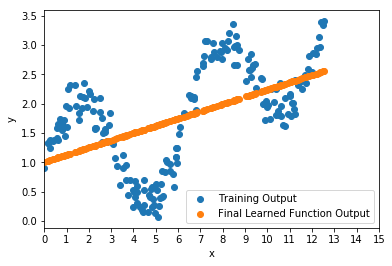

P: 2
W: [ 1.55636445 -0.09905134  0.02105954]



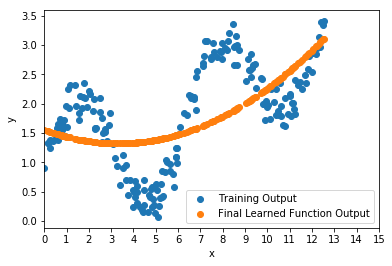

P: 3
W: [ 2.2585207  -0.4731082   0.09166343 -0.0074039 ]



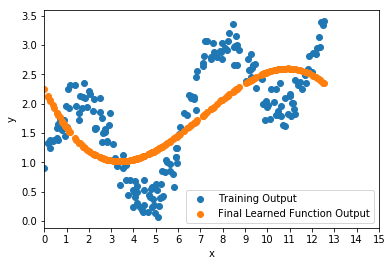

P: 5
W: [ 2.32031732e-01  1.70733532e+00 -7.50673264e-01  1.66018570e-01
 -2.11820885e-02  1.49990203e-03]



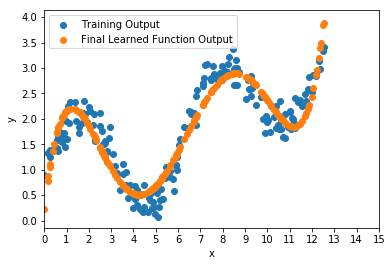

P: 10
W: [ 1.00199719e+00  3.46174032e-01 -6.79997048e-02  4.04746152e-02
 -2.41324409e-02  7.30654951e-03 -1.30797499e-03  1.49023358e-04
 -1.05582815e-05  3.71804211e-07  2.73112041e-09]



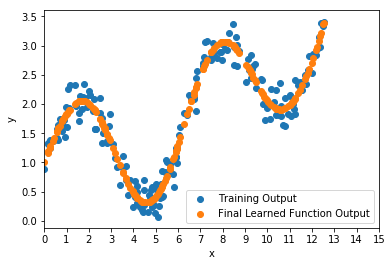

In [182]:
basis_expanded_ridge_reg()

## Answer 8

In [179]:
def get_poly_kernel(P):
    def k(x,xp):
        kernel_value = (1+np.inner(x, xp))**P
        return kernel_value
    return k

## Answer 9

In [180]:
x  = 0.5
xp = 0.7
k  = get_poly_kernel(5)
h  = get_poly_expansion(5)
out1 = k(x,xp)
out2 = np.inner(h(x),h(xp))
print("output 1", out1)
print("output 2", out2)

output 1 4.484033437500002
output 2 [[4.48403344]]


## Answer 10

In [209]:
def train_kernel_ridge(X,Y,l,k):
    N = X.shape[0]
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            K[i][j] = k(X[i],X[j])
    a = np.linalg.solve(K + l*np.identity(N), Y)
    return a

In [210]:
min(train_kernel_ridge(X_trn,Y_trn,0.1,get_poly_kernel(9)))

-13.715921884183432

## Answer 11

In [185]:
def eval_kernel_ridge(X_trn, x, a, k):
    y = np.dot(a, np.array(list(map(lambda x1: k(x1, x), X_trn))))
    return y

In [193]:
k = get_poly_kernel(3)

In [194]:
eval_kernel_ridge(X_trn, 1, train_kernel_ridge(X_trn,Y_trn,0.1,k), k)

1.5904350610508118

## Answer 12

In [197]:
def kernel_ridge_reg():
    for P in [1, 2, 3, 5, 10]:
        k = get_poly_kernel(P)
        a = train_kernel_ridge(X_trn, Y_trn, 0.1, k)
        print(f"P: {P}")
        Y = []
        for X in X_trn:
            Y.append(eval_kernel_ridge(X_trn, X, a, k))
        Y = np.array(Y)
        plt.scatter(X_trn, Y_trn, label="Training Output")
        plt.scatter(X_trn, Y, label="Final Learned Function Output")
        plt.xlim([0, 15])
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xticks(np.arange(0, 16, 1))
        plt.legend()
        plt.show()

P: 1


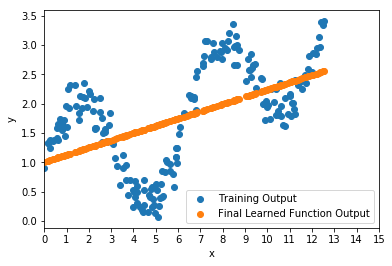

P: 2


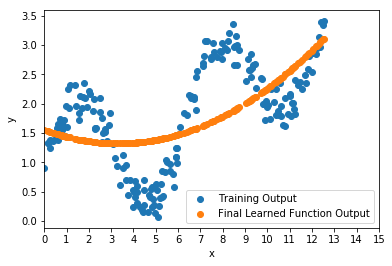

P: 3


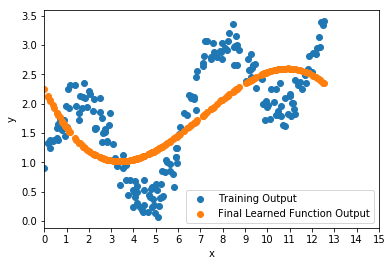

P: 5


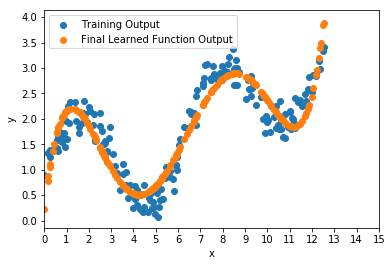

P: 10


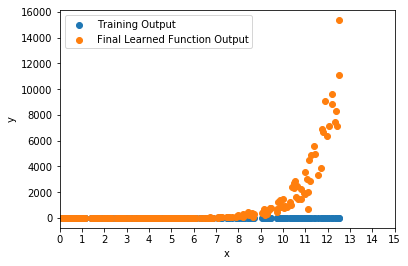

In [198]:
kernel_ridge_reg()

## Answer 13

In [211]:
Y_trn

array([0.23653, 1.80877, 1.64149, 1.62622, 1.82506, 2.6665 , 0.24406,
       1.31652, 2.16147, 1.58179, 2.25877, 0.8361 , 1.81299, 2.45465,
       0.19146, 0.60323, 0.12788, 2.80956, 0.2729 , 3.07615, 1.84775,
       1.79202, 2.41917, 2.89351, 1.38548, 1.81327, 0.69717, 2.82036,
       2.8467 , 3.3928 , 1.5002 , 0.96915, 0.94838, 1.84289, 2.01508,
       1.98543, 2.1309 , 1.57797, 2.13274, 2.88623, 0.62809, 2.24315,
       1.33673, 3.33688, 2.41118, 1.01221, 0.60851, 1.32162, 1.64588,
       0.39732, 0.89512, 1.44169, 0.69321, 3.15627, 0.22989, 1.57161,
       3.03744, 0.15938, 3.21344, 1.62792, 1.34161, 0.27559, 1.94372,
       1.34185, 2.77026, 0.84805, 1.92709, 1.99596, 0.40084, 2.94842,
       0.48887, 3.07027, 2.22417, 0.85735, 2.92102, 1.41755, 2.65282,
       2.6062 , 1.741  , 1.82915, 2.80533, 2.16306, 1.54687, 2.14845,
       3.36434, 1.37184, 0.62671, 1.04346, 0.69936, 1.79013, 1.72158,
       2.02912, 1.95686, 1.37671, 0.15908, 2.84537, 2.09202, 1.96837,
       1.11679, 2.86